# Učitavanje datoteka

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
download_url = "https://drive.google.com/uc?id=1qXq6k2rNR_dgG9XA4uMjAeuzUYkGx7HZ"

In [3]:
df = pd.read_csv(download_url)
df.job_functions = df.job_functions.apply(eval)
df.industries = df.industries.apply(eval)

df.head()

,job_title,seniority_level,employment_type,industries,job_functions
0,Manual Tester,Entry level,Full-time,[Information Technology and Services],"[Engineering, Information Technology]"
1,Field Marketing Representative,Entry level,Full-time,"[Food & Beverages, Wholesale, Retail]","[Marketing, Sales]"
2,Consumer Relations Representative,Associate,Full-time,"[Marketing and Advertising, Food & Beverages, ...",[Other]
3,Software Engineer In Test,Mid-Senior level,Full-time,"[Information Technology and Services, Computer...","[Information Technology, Quality Assurance]"
4,Electrician,Entry level,Full-time,"[Electrical/Electronic Manufacturing, Construc...","[Management, Manufacturing]"


In [4]:
download_url = "https://drive.google.com/uc?id=1emt0cqUyMlGr6sJzUIWR9omqBJbODMkU"
test = pd.read_csv(download_url)
test.job_functions = test.job_functions.apply(eval)
test.industries = test.industries.apply(eval)

test.head()

,job_title,seniority_level,employment_type,industries,job_functions
0,"CAD Drafter - Dallas, TX",Not Applicable,Full-time,"[Construction, Civil Engineering, Real Estate]","[Design, Art/Creative, Information Technology]"
1,COMPUTER ANALYST NOC-2171,Entry level,Full-time,"[Information Technology and Services, Computer...",[Information Technology]
2,Videographer,Entry level,Full-time,"[Marketing and Advertising, Internet, Financia...","[Design, Art/Creative, Information Technology]"
3,Sales Representative,Entry level,Full-time,"[Building Materials, Machinery, Mechanical or ...","[Sales, Business Development]"
4,Open job positions for all employees,Entry level,Full-time,"[Electrical/Electronic Manufacturing, Construc...",[Other]


### EDA - Exploratory data analysis

#### Eksplorativna analiza podataka - proučiti kako su strukturirani podaci

CILJ: 
Saznati distribuciju oznaka seniority_level, employment_type, industries i job_functions. Provjeriti distribuciju broja riječi/slova u naslovu posla.

##### Distribucija oznaka za seniority_level

In [5]:
df.seniority_level.describe()

count          100000
unique              7
top       Entry level
freq            47065
Name: seniority_level, dtype: object

In [6]:
df.seniority_level.isnull().sum()

0

In [7]:
df.seniority_level.unique()

array(['Entry level', 'Associate', 'Mid-Senior level', 'Director',
       'Internship', 'Not Applicable', 'Executive'], dtype=object)

In [8]:
df.seniority_level.value_counts()

Entry level         47065
Associate           23021
Mid-Senior level    13497
Not Applicable       9925
Director             4107
Internship           1254
Executive            1131
Name: seniority_level, dtype: int64

<AxesSubplot:>

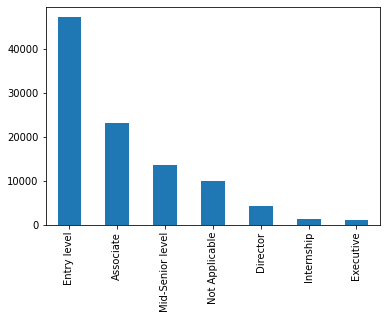

In [9]:
df.seniority_level.value_counts().plot.bar()

##### Distribucija oznaka za employment_type

In [10]:
df.employment_type.describe()

count        100000
unique            7
top       Full-time
freq          86960
Name: employment_type, dtype: object

In [11]:
df.employment_type.isnull().sum()

0

In [12]:
df.employment_type.unique()

array(['Full-time', 'Part-time', 'Contract', 'Volunteer', 'Internship',
       'Temporary', 'Other'], dtype=object)

In [13]:
df.employment_type.value_counts()

Full-time     86960
Part-time      6467
Contract       3100
Temporary      2093
Internship      796
Volunteer       343
Other           241
Name: employment_type, dtype: int64

<AxesSubplot:>

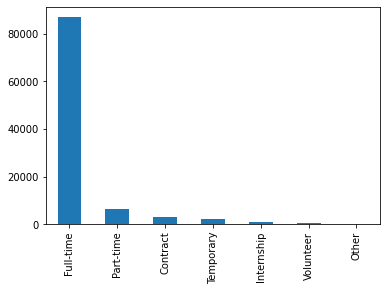

In [14]:
df.employment_type.value_counts().plot.bar()

##### Distribucija oznaka za industries

Get all industries

In [15]:
all_industries = []
for cell in df.industries:
    for industry in cell:
        if industry not in all_industries:
            all_industries.append(industry)

all_industries

['Information Technology and Services',
 'Food & Beverages',
 'Wholesale',
 'Retail',
 'Marketing and Advertising',
 'Consumer Goods',
 'Computer Software',
 'Internet',
 'Electrical/Electronic Manufacturing',
 'Construction',
 'Security and Investigations',
 'Biotechnology',
 'Chemicals',
 'Pharmaceuticals',
 'Law Practice',
 'Legal Services',
 'Management Consulting',
 'Staffing and Recruiting',
 'Human Resources',
 'Nonprofit Organization Management',
 'Higher Education',
 'Education Management',
 'Aviation & Aerospace',
 'Airlines/Aviation',
 'Medical Practice',
 'Real Estate',
 'Financial Services',
 'Insurance',
 'Banking',
 'Hospital & Health Care',
 'Food Production',
 'Mechanical or Industrial Engineering',
 'Accounting',
 'Health, Wellness and Fitness',
 'Research',
 'Government Administration',
 'Telecommunications',
 'Entertainment',
 'Events Services',
 'Hospitality',
 'Automotive',
 'Machinery',
 'Building Materials',
 'Transportation/Trucking/Railroad',
 'Design',
 'Cons

In [16]:
len(all_industries)

147

Calculate jobs per industry

In [17]:
jobs_per_industry = {k: 0 for k in all_industries}
for cell in df.industries:
    for item in cell:
        jobs_per_industry[item] += 1
        
jobs_per_industry = dict(reversed(sorted(jobs_per_industry.items(), key=lambda item: item[1])))
jobs_per_industry

{'Construction': 18280,
 'Hospital & Health Care': 18043,
 'Staffing and Recruiting': 15411,
 'Nonprofit Organization Management': 13447,
 'Financial Services': 13404,
 'Information Technology and Services': 12653,
 'Computer Software': 8046,
 'Health, Wellness and Fitness': 7296,
 'Retail': 7167,
 'Education Management': 6783,
 'Government Administration': 6612,
 'Higher Education': 6430,
 'Food & Beverages': 6034,
 'Marketing and Advertising': 5400,
 'Hospitality': 4774,
 'Automotive': 4611,
 'Mechanical or Industrial Engineering': 4376,
 'Transportation/Trucking/Railroad': 4325,
 'Medical Practice': 4025,
 'Consumer Goods': 3985,
 'Electrical/Electronic Manufacturing': 3984,
 'Oil & Energy': 3686,
 'Internet': 3490,
 'Machinery': 3170,
 'Insurance': 2695,
 'Restaurants': 2649,
 'Civil Engineering': 2329,
 'Banking': 2286,
 'Consumer Services': 2168,
 'Food Production': 2166,
 'Defense & Space': 2139,
 'Pharmaceuticals': 2052,
 'Primary/Secondary Education': 2017,
 'Research': 1955,


In [18]:
industries_df = pd.Series(jobs_per_industry)
industries_df.head()

Construction                         18280
Hospital & Health Care               18043
Staffing and Recruiting              15411
Nonprofit Organization Management    13447
Financial Services                   13404
dtype: int64

Show industries distributions

In [19]:
industries_df.describe()

count      147.000000
mean      1730.700680
std       3314.431932
min          1.000000
25%         89.000000
50%        382.000000
75%       1684.500000
max      18280.000000
dtype: float64

<AxesSubplot:>

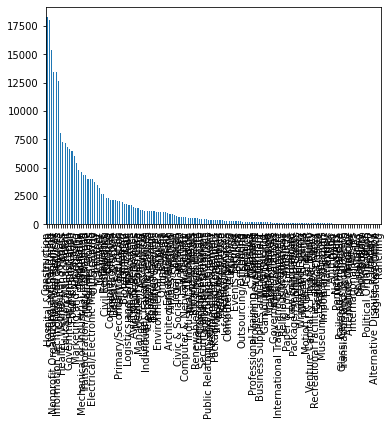

In [20]:
industries_df.plot.bar()

Show lower and upper quartile industries

In [21]:
low_q = industries_df.quantile(0.25)
median = industries_df.quantile(0.5)
high_q = industries_df.quantile(0.75)

<AxesSubplot:>

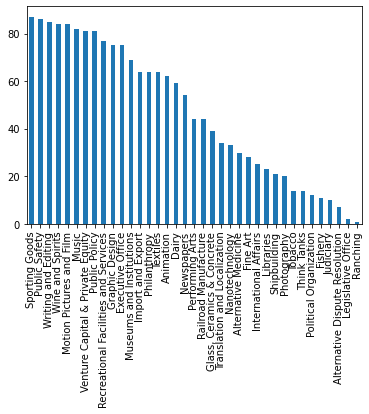

In [22]:
industries_df[industries_df < low_q].plot.bar()

<AxesSubplot:>

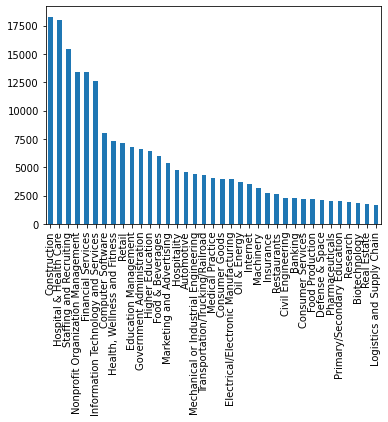

In [23]:
industries_df[industries_df > high_q].plot.bar()

##### Distribucija oznaka za job_functions

Get all job functions

In [24]:
all_job_functions = []

for cell in df.job_functions:
    for job_function in cell:
        if job_function not in all_job_functions:
            all_job_functions.append(job_function)
            
all_job_functions

['Engineering',
 'Information Technology',
 'Marketing',
 'Sales',
 'Other',
 'Quality Assurance',
 'Management',
 'Manufacturing',
 'Legal',
 'Design',
 'Art/Creative',
 'Education',
 'Training',
 'Health Care Provider',
 'Accounting/Auditing',
 'Consulting',
 'Analyst',
 'Human Resources',
 'Business Development',
 'Research',
 'Production',
 'Distribution',
 'General Business',
 'Finance',
 'Supply Chain',
 'Customer Service',
 'Administrative',
 'Public Relations',
 'Writing/Editing',
 'Project Management',
 'Science',
 'Strategy/Planning',
 'Advertising',
 'Product Management',
 'Purchasing']

In [25]:
len(all_job_functions)

35

In [26]:
jobs_per_function = {k: 0 for k in all_job_functions}
for cell in df.job_functions:
    for item in cell:
        jobs_per_function[item] += 1
        
jobs_per_function = dict(reversed(sorted(jobs_per_function.items(), key=lambda item: item[1])))
jobs_per_function

{'Information Technology': 22680,
 'Management': 22604,
 'Manufacturing': 19378,
 'Other': 19220,
 'Sales': 9534,
 'Engineering': 9208,
 'Health Care Provider': 7561,
 'Education': 5810,
 'Training': 5693,
 'Business Development': 5454,
 'Finance': 4625,
 'Design': 4072,
 'Administrative': 3820,
 'Marketing': 3739,
 'Art/Creative': 3645,
 'Analyst': 3416,
 'Research': 3348,
 'Customer Service': 3331,
 'Accounting/Auditing': 2130,
 'Project Management': 2059,
 'Writing/Editing': 1920,
 'Public Relations': 1863,
 'Human Resources': 1746,
 'Quality Assurance': 1513,
 'Consulting': 1332,
 'Legal': 1327,
 'General Business': 1058,
 'Supply Chain': 1045,
 'Strategy/Planning': 1041,
 'Production': 817,
 'Science': 745,
 'Product Management': 557,
 'Purchasing': 539,
 'Advertising': 472,
 'Distribution': 331}

In [27]:
job_functions_df = pd.Series(jobs_per_function)
job_functions_df.head()

Information Technology    22680
Management                22604
Manufacturing             19378
Other                     19220
Sales                      9534
dtype: int64

Show job_functions distributions

In [28]:
job_functions_df.describe()

count       35.000000
mean      5075.228571
std       6281.478826
min        331.000000
25%       1192.500000
50%       3331.000000
75%       5573.500000
max      22680.000000
dtype: float64

<AxesSubplot:>

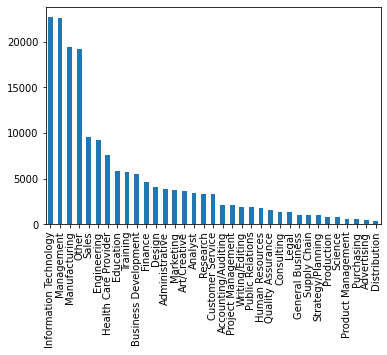

In [29]:
job_functions_df.plot.bar()

### Model for seniority_level predictions

Kreiranje modela za predikciju seniority_levela na temelju naslova posla. Za početak je bitno da taj model bude što jednostavniji i da radi. Bitno je samo da se model trenira, performanse su totalno nebitne. U tom dijelu je dobro i definirati “baseline” model i metriku.

CILJ:
Metrika, baseline model i jednostavni model.

In [30]:
import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/hrvoje/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

def clean_text(text):
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text) 
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    
    return text

In [32]:
df.job_title = df.job_title.apply(clean_text)
df.job_title

0                              manual tester
1             field marketing representative
2          consumer relations representative
3                     software engineer test
4                                electrician
                        ...                 
99995                    roof loader striker
99996       quality assurance representative
99997         paratransit shuttle bus driver
99998    apprenticeship trained patternmaker
99999                      bridge inspectors
Name: job_title, Length: 100000, dtype: object

Find out how many is words in job titles

Import tokenizer

In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [34]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df.job_title)
tokenizer.index_word

{1: 'manager',
 2: 'technician',
 3: 'specialist',
 4: 'assistant',
 5: 'engineer',
 6: 'director',
 7: 'operator',
 8: 'coordinator',
 9: 'senior',
 10: 'analyst',
 11: 'supervisor',
 12: 'associate',
 13: 'service',
 14: 'officer',
 15: 'sales',
 16: 'operations',
 17: 'clerk',
 18: 'teacher',
 19: 'services',
 20: 'worker',
 21: 'support',
 22: 'health',
 23: 'development',
 24: 'representative',
 25: 'maintenance',
 26: 'consultant',
 27: 'driver',
 28: 'production',
 29: 'ii',
 30: 'project',
 31: 'lead',
 32: 'program',
 33: 'instructor',
 34: 'research',
 35: 'shift',
 36: 'care',
 37: 'medical',
 38: 'business',
 39: 'nurse',
 40: 'clinical',
 41: 'systems',
 42: 'management',
 43: 'designer',
 44: 'quality',
 45: 'professor',
 46: 'administrator',
 47: 'mechanic',
 48: 'field',
 49: 'engineering',
 50: 'time',
 51: 'control',
 52: 'security',
 53: 'education',
 54: 'general',
 55: 'data',
 56: 'technical',
 57: 'school',
 58: 'customer',
 59: 'executive',
 60: 'design',
 61: '

In [35]:
tokenizer.word_counts

OrderedDict([('manual', 101),
             ('tester', 208),
             ('field', 934),
             ('marketing', 749),
             ('representative', 1385),
             ('consumer', 118),
             ('relations', 365),
             ('software', 557),
             ('engineer', 4984),
             ('test', 342),
             ('electrician', 265),
             ('service', 2206),
             ('supervisor', 2802),
             ('junior', 427),
             ('legal', 277),
             ('consultant', 1346),
             ('ehs', 65),
             ('law', 141),
             ('france', 14),
             ('security', 871),
             ('officer', 2098),
             ('drama', 39),
             ('director', 3871),
             ('master', 188),
             ('teacher', 1660),
             ('mentor', 36),
             ('coach', 423),
             ('gulfstream', 4),
             ('650er', 2),
             ('pilot', 151),
             ('clinical', 1042),
             ('forensic', 90),
      

In [36]:
word_count_df = pd.Series(tokenizer.word_counts)
word_count_df

manual             101
tester             208
field              934
marketing          749
representative    1385
                  ... 
uama                 1
biomaterials         1
34879                1
218253               1
housemanager         1
Length: 23181, dtype: int64

In [37]:
word_count_df.describe()

count    23181.000000
mean        14.694448
std        124.679290
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       8601.000000
dtype: float64

In [38]:
len(word_count_df)

23181

In [39]:
len(word_count_df[word_count_df > 3])

5643

#### Create model

In [40]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 10000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 16
# This is fixed.
EMBEDDING_DIM = 300

tokenizer = Tokenizer(
    num_words=MAX_NB_WORDS, 
    filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', 
    lower=True)

tokenizer.fit_on_texts(df.job_title.values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 23181 unique tokens.


In [41]:
X = tokenizer.texts_to_sequences(df.job_title.values)

In [42]:
X

[[576, 281],
 [48, 63, 24],
 [502, 139, 24],
 [90, 5, 151],
 [199],
 [13, 11],
 [117, 191, 26, 798, 412, 2393],
 [52, 14],
 [1192, 6],
 [313, 18, 1261, 118],
 [4852, 6922, 387],
 [40, 634, 354, 3899, 196],
 [247, 234, 15, 12],
 [88, 36, 3],
 [170, 122, 1540, 1958],
 [624, 3, 624, 10],
 [9630, 2394, 9, 77, 133, 132, 9, 133, 132],
 [2395, 94],
 [117, 431, 84, 919, 790, 4327],
 [5644, 1878, 1019],
 [4328, 138, 163],
 [241, 12],
 [127, 39, 179, 2203, 173],
 [41, 10],
 [1245, 1, 1572, 9631, 26],
 [119, 8],
 [6923, 27, 3900, 1000],
 [929, 155],
 [147, 116, 137, 33, 3099, 334, 361],
 [238],
 [44, 11],
 [537],
 [3553, 9632, 9633, 355],
 [390, 7],
 [2296, 264, 173],
 [9, 176, 5],
 [597, 4329, 3319, 5645],
 [44, 164],
 [140, 3100, 1058],
 [158, 82, 503, 408, 295, 32],
 [2896, 893, 1105, 3901, 1469, 2614],
 [658, 18],
 [169, 186, 10],
 [1822],
 [1435, 20],
 [242, 34, 31, 9634],
 [89, 1036, 415, 35, 211],
 [9, 72, 23, 84],
 [2503, 1959, 2897],
 [498, 498, 2396, 2046, 59, 498],
 [492, 52],
 [598, 1

In [43]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [44]:
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (100000, 16)


In [45]:
Y = pd.get_dummies(df.seniority_level).values
print('Shape of label tensor:', Y.shape)
NUMBER_OF_CLASSES = Y.shape[1]

Shape of label tensor: (100000, 7)


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
#from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [47]:
X.shape

(100000, 16)

In [48]:
Y.shape

(100000, 7)

In [49]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(LSTM(256, dropout=0.2))
model.add(Dense(NUMBER_OF_CLASSES, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[ 'accuracy'])

2022-02-22 11:07:01.028981: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-22 11:07:01.527284: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-22 11:07:01.527467: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-22 11:07:01.541756: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [50]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 16, 300)           3000000   
                                                                 
 lstm (LSTM)                 (None, 256)               570368    
                                                                 
 dense (Dense)               (None, 7)                 1799      
                                                                 
Total params: 3,572,167
Trainable params: 3,572,167
Non-trainable params: 0
_________________________________________________________________
None


In [51]:
epochs = 10
batch_size = 32

history = model.fit(X, Y, epochs=epochs, batch_size=batch_size,
                    validation_split=0.2
                   )

Epoch 1/10


2022-02-22 11:07:12.289038: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8301


2500/2500 [==============================] - 20s 5ms/step - loss: 0.9558 - accuracy: 0.6673 - val_loss: 0.8837 - val_accuracy: 0.6914
Epoch 2/10
2500/2500 [==============================] - 12s 5ms/step - loss: 0.8094 - accuracy: 0.7190 - val_loss: 0.8764 - val_accuracy: 0.6970
Epoch 3/10
2500/2500 [==============================] - 12s 5ms/step - loss: 0.7402 - accuracy: 0.7410 - val_loss: 0.8964 - val_accuracy: 0.6993
Epoch 4/10
2500/2500 [==============================] - 12s 5ms/step - loss: 0.6804 - accuracy: 0.7601 - val_loss: 0.9402 - val_accuracy: 0.6942
Epoch 5/10
2500/2500 [==============================] - 12s 5ms/step - loss: 0.6255 - accuracy: 0.7790 - val_loss: 0.9937 - val_accuracy: 0.6974
Epoch 6/10
2500/2500 [==============================] - 11s 5ms/step - loss: 0.5754 - accuracy: 0.7964 - val_loss: 1.0454 - val_accuracy: 0.6931
Epoch 7/10
2500/2500 [==============================] - 11s 5ms/step - loss: 0.5307 - accuracy: 0.8115 - val_loss: 1.1065 - val_accuracy: 0.6

#### Draw graph

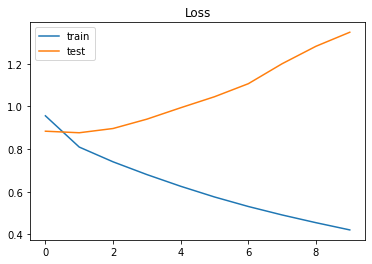

In [52]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

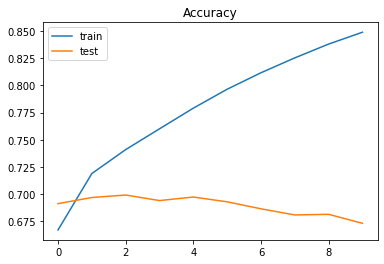

In [53]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();